In [4]:
import tensorflow as tf
import numpy as np
import pandas as pd

C:\Users\whpvm\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\whpvm\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\whpvm\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [5]:
import os
url = r'C:\\Users\\whpvm\\Desktop\\TenProject\\tenprojectML\src\csv\housing.csv'
housing = pd.read_csv(url)

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
# khai báo backend thư viện đồ họa của jupiter notebook
%matplotlib inline

In [9]:
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EAFE9F4588>,
      dtype=object)

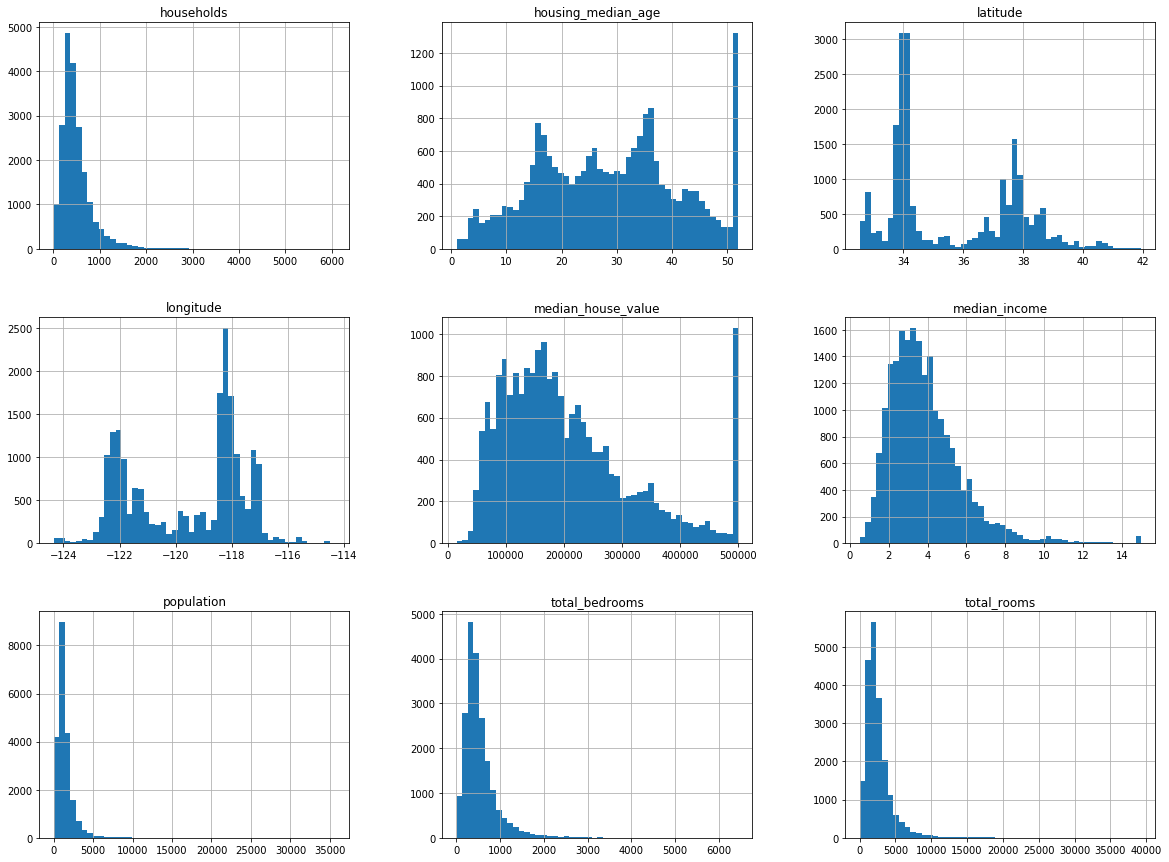

In [12]:
# fgsize là kích thước của biểu đồ
housing.hist(bins=50, figsize=(20,15))
# bt phân phối chuản sẽ có dạng hình chuông

# visualization location

![](https://www.google.com/maps/vt/data=rqQ8R4VphkuIVqR6JgDfukfKMQIVikuPonoXFmpxXIz48PwU3D6HiWqGAwEDuICRQspMSwvEFC1rLmiFNseyHwAzMrnJ-WdR1FaoVHcdGbr60mb02LorTaRcNXVnMS0UI4i_OoTIPotf21NXTW4CkhQX9QMO7aEclNn78Bg_rTJP59WoSzV3zWKaMdqEzE75GFid8Xu6d7sSwtzlUILl-h2bfVdf8nlxYXEOl47ndbio0xY)

# draw location data

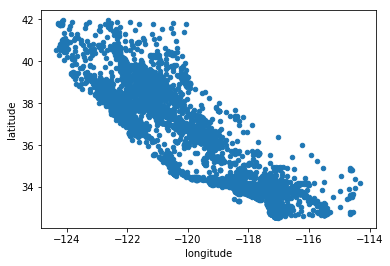

In [21]:
housing.plot(kind='scatter', x='longitude', y='latitude')

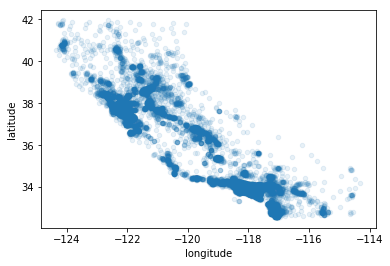

In [23]:
# dữ liệu hơi dày đặc nên cho thêm hệ số alpha nó giúp điểm nào ít dữ liệu thì nó sẽ giảm bớt
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

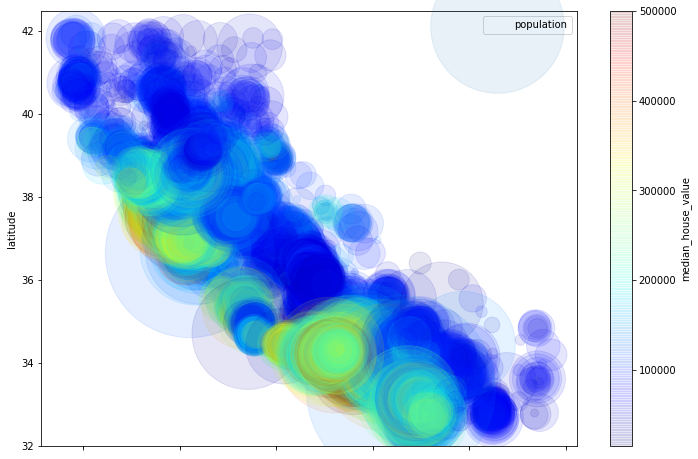

In [27]:
# ta thấy những khu vực giáp ranh vs biển thì có mật độ nhiều hơn
# QH giữa mật độ dân cư và tọa độ địa lý và giá nhà
# vẽ thêm vùng nào đông thì  bán kính sẽ rộng hơn
# c là màu sắc map vào cmap, để kiểu jet để nó theo thang tọa độ
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1, s=housing['population'], label='population', figsize=(12, 8),
            c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)

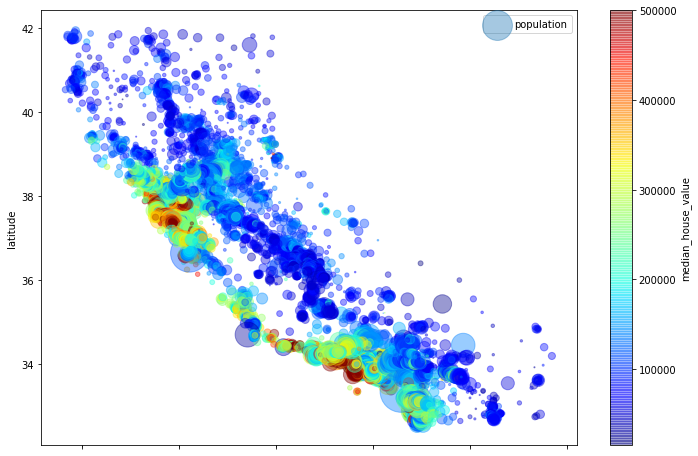

In [30]:
# vì hơi khó nhìn nên chia bán kính cho 20 cho dễ nhìn
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, s=housing['population']/20, label='population', figsize=(12, 8),
            c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)

In [31]:
# ta thấy màu xanh dương đến đỏ là giá cao thì tập trung chủ yếu ở gần ven biển
# và các vòng tròn ở ven biển bán kính khá là rộng chứng tỏ mật độ dân cư cũng khá cao
# sau khi xem xét dữ liệu chúng ta có thể đưa thêm dữ liệu vùng ven biển để mô hình của chúng ta có thể chính xác hơn

In [32]:
# tính toán ma trận tương quan - nó là một phần để thể hiện sự sử dụng một cái hàm tuyến tính ví dụ như là giá nhà tăng thì thuộc tính nào tăng, thuộc tính nào giảm thể hiện trên corr_maxtrix - trong pandas hỗ trợ sẵn r
corr_matrix = housing.corr()

In [33]:
# tìm hiểu sự tương quan về giá so với các thuộc tính còn lại
corr_matrix['median_house_value']

longitude            -0.045967
latitude             -0.144160
housing_median_age    0.105623
total_rooms           0.134153
total_bedrooms        0.049686
population           -0.024650
households            0.065843
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [34]:
# ta thấy tất nhiên là giá với giá tương quan là 1.00000
# thuộc tính cũng khá tương quan là thu nhập trung bình 0.6888075
# households khu vực đông khu nhà thì giá nhà cx có thể cao hơn
# ngoài ra chúng ta có thể dùng những thuật toán như random forest hay decicion tree để chúng ta lựa chọn những thuộc tính có độ ảnh hưởng đến cái giá



In [35]:
# sau khi có độ tương quan r cần đi cleaning dữ liệu vì dữ liệu bị thiếu khá là nhiều và nhiễu


# Cleaning data


In [36]:
# có mấy cách như thiếu thì bỏ luôn
# có thể thay thế bằng giá trị tb hay dữ liệu nào đó thể hiện đặc trưng của các dữ liệu còn lại
# ở đây chọn giải pháp là chọn giá trị trung bình
median = housing['total_bedrooms'].median()

In [37]:
# thay thế các total_bedrooms bằng hàm fillna
housing['total_bedrooms'].fillna(median, inplace=True)

In [38]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20640 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [39]:
# chúng ta có thể thấy nhũng giá trị trống đã thay bằng giá trị trung vị của các thuộc tính còn lại


In [40]:
# đây không phải dữ liệu từng nhà mà là dữ liệu theo từng quận của california

# combination features (Tổng hợp các cái thuộc tính này lại)


In [42]:
# dặt mọt biến mới tên là  room_per_household
housing['room_per_household'] = housing['total_rooms'] / housing['households']
housing['bedroom_per_household'] = housing['total_bedrooms'] / housing['households']
# số người trong một ngôi nhà
housing['population_per_household'] = housing['population'] / housing['households']
housing.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,room_per_household,bedroom_per_household,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,1.023810,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.971880,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,1.073446,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,1.073059,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,1.081081,2.181467


In [43]:
# thử lại ma trận tương quan với dữ liệu mới

In [44]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values()

latitude                   -0.144160
longitude                  -0.045967
bedroom_per_household      -0.045637
population                 -0.024650
population_per_household   -0.023737
total_bedrooms              0.049457
households                  0.065843
housing_median_age          0.105623
total_rooms                 0.134153
room_per_household          0.151948
median_income               0.688075
median_house_value          1.000000
Name: median_house_value, dtype: float64

In [45]:
#ta thấy một dạng dữ liệu text trong tập dữ liệu nữa nên cần xử lý sang category

# Text to categories

In [47]:
# make one hot encoder - sẽ biến nó thành chuỗi  mã hóa chỉ có 0 và 1

In [48]:
# chúng ta phải đặt một biến mới để tránh xung đột với các biến còn lại
# lệnh này nghĩa là nó sẽ convert nhũng biến nào có prefix là ocean_proximity thành cái one hot encoder 
housing_dummies = pd.get_dummies(housing, prefix=['ocean_proximity'])
housing_dummies.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,room_per_household,bedroom_per_household,population_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,1.02381,2.555556,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.97188,2.109842,0,0,0,1,0


In [49]:
# chúng ta cần làm chuẩn phân phối này

# Step Scaling data

In [51]:
# chúng ta có 2pp có thể áp dụng
# sử dụng thư viện sklean : minmax scaler nó sẽ chuyển dữ liệu của chúng ta từ khoảng min đến max
# còn standard scaler chuyển về dạng phân phối chuẩn
from sklearn.preprocessing import MinMaxScaler
# fit dữ liệu scaler này vào
scaler = MinMaxScaler()
# vì bài toán dự đoán giá nhà nên phải drop median_house_value
housing_features =  housing_dummies.drop('median_house_value', axis=1)
# hàm fit_transform tạo và chuyển hóa housing_features về dạng minmaxscaler
X_data = scaler.fit_transform(housing_features)
X_data.shape

C:\Users\whpvm\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


(20640, 16)

In [52]:
y_data =  np.array(housing_dummies['median_house_value'])

In [53]:
y_data.shape

(20640,)

In [54]:
# k giống kiểu dữ liệu nên phải reshape

In [55]:
y_data = y_data.reshape(y_data.shape[0], 1)

In [57]:
y_data.shape

(20640, 1)

# chạy thử thuật toán nhưng trước tiên cần chạy train_test_split

In [58]:
from sklearn.model_selection import train_test_split
# để random_state bằng 42 để lần nào chúng ta sinh dữ liệu cũng giống nhau
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

C:\Users\whpvm\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [59]:
X_train.shape

(16512, 16)

In [60]:
X_test.shape

(4128, 16)

In [62]:
from sklearn.linear_model import LinearRegression

C:\Users\whpvm\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [63]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [65]:
y_pred = model.predict(X_test)

In [66]:
# muốn đánh giá được hệ thống này ta có hàm score

In [67]:
model.score(X_test, y_test)

0.5888762489802173

In [68]:
# vì dữ liệu trong bài này khá lớn nên ta sẽ sử dụng root mean square error
# root mean square error cũng chính là căn bậc 2 của mean square error

In [70]:
from sklearn.metrics import mean_squared_error

In [71]:
def rmse_error(y_pred, y_test):
    mse_error = mean_squared_error(y_pred, y_test)
    return np.sqrt(mse_error)
rmse_error(y_pred, y_test)

73398.927410719

# training tf

In [72]:
n_dim = X_train.shape[1]

In [73]:
# các placeholder để truyền dữ liệu vào
X = tf.placeholder(tf.float32, [None, n_dim])
# print(X.shape)
y = tf.placeholder(tf.float32, [None, 1])

# chúng ta cần khởi tạo wo, w1 ban đầu
# vì chúng k phải tạo từ dữ liệu nên dùng variable
W = tf.Variable(tf.ones([n_dim, 1]))
b = tf.Variable(np.random.randn(), dtype=tf.float32)

In [91]:
pred = tf.add(tf.matmul(X, W), b)
# lấy trung bình tổng các giá trị
loss = tf.sqrt(tf.reduce_mean(tf.square(pred - y)))
# trong tensorflow đã có sẵn GradientDescent
# .minimize() cực tiểu hóa hàm loss
learning_rate = 300
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)

In [92]:
init = tf.global_variables_initializer()

In [93]:
sess= tf.Session()
# chạy khởi tạo trước đã
# để khưởi tạo session trên đây thì có thể chạy lại train
sess.run(init)

In [96]:
# training
# cần định nghĩa training trong bao lâu, epochs for để training tối ưu loss
# feed_dict truyền vào các tham số của pred
epochs = 20000
loss_history = []
for epoch in range(epochs):
    # trong hàm này tối ưu optimizer để minima
    sess.run(optimizer, feed_dict={X: X_train, y: y_train})
    
    test_loss = sess.run(loss, feed_dict={X: X_test, y: y_test})
    loss_history.append(test_loss)
    if epoch % 500 == 0:
        print("epouch {} test loss = {}", epoch ,test_loss)
print("Finish training")

epouch {} test loss = {} 0 73195.68
epouch {} test loss = {} 500 73177.66
epouch {} test loss = {} 1000 73160.555
epouch {} test loss = {} 1500 73144.305
epouch {} test loss = {} 2000 73128.87
epouch {} test loss = {} 2500 73114.19
epouch {} test loss = {} 3000 73100.21
epouch {} test loss = {} 3500 73086.92
epouch {} test loss = {} 4000 73074.25
epouch {} test loss = {} 4500 73062.164
epouch {} test loss = {} 5000 73050.63
epouch {} test loss = {} 5500 73039.625
epouch {} test loss = {} 6000 73029.1
epouch {} test loss = {} 6500 73019.04
epouch {} test loss = {} 7000 73009.4
epouch {} test loss = {} 7500 73000.164
epouch {} test loss = {} 8000 72991.3
epouch {} test loss = {} 8500 72982.79
epouch {} test loss = {} 9000 72974.62
epouch {} test loss = {} 9500 72966.74
epouch {} test loss = {} 10000 72959.164
epouch {} test loss = {} 10500 72951.85
epouch {} test loss = {} 11000 72944.805
epouch {} test loss = {} 11500 72937.99
epouch {} test loss = {} 12000 72931.38
epouch {} test loss 

In [97]:
# training ít ra cũng phải bằng sklearn 73398.927410719